In [101]:
import pandas
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [133]:
df = pandas.read_excel('./SEout.xlsx')

In [135]:
df.isnull().sum().sum()

name               0
stuid              0
creditScore        0
大学生职业发展与就业指导（一）    0
计算机组成原理            0
大学生军事技能与军事理论       0
数据结构               0
思想道德修养与法律基础        0
Java程序设计基础         0
形势与政策1             0
Java程序设计基础实验       0
大学英语一              1
数据结构实验             0
体育一                0
数据库系统及应用           0
大学生计算机文化基础         1
数据库系统及应用实验         0
C语言程序设计实验          0
科技论文阅读与科研创新2       0
离散数学               0
概率论与数理统计           0
C语言程序设计            0
大学物理下              0
C语言程序设计课程设计        0
大学物理实验下            0
高等数学理工类1           0
创新创业基础             0
大学生职业发展与就业指导（二）    0
大学生职业发展与就业指导（三）    0
马克思主义基本原理概论        0
中国近代史纲要            0
形势与政策2             0
形势与政策4             0
大学英语二              0
体育四                0
体育二                0
操作系统原理与设计          0
C++程序设计            0
Java程序设计高级         0
C++程序设计实验          0
软件工程               0
Web开发              0
面向对象分析与设计实验        0
Web开发实验            0
软件测试实验             0
科技论文阅读与科研创新1       0
UNIX/LINUX         0
高等数学理工类2     

In [104]:
def drawBarh( 
    bgColor='#27283C',
    color='#F8783B',
    titleColor='#fff',
    xyTickColor='#fff',
    xyLabelColor='#fff',
    series=None,
    range=(0,100),
    title='',
    xLabel='分数',
    yLabel='科目',
    dpi=500,
    savePath=None
    ):


    plt.figure(figsize=(12, 6),facecolor=bgColor, dpi=dpi)
    plt.barh(series.index, series.values, color=color, alpha=0.8, align='center', edgecolor='#555', linewidth=1)
    # 字体大小
    plt.yticks(fontsize=15, color=xyTickColor)
    plt.xticks(fontsize=15, color=xyTickColor)

    # 去除上右边框
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_color(xyTickColor)
    plt.gca().spines['bottom'].set_color(xyTickColor)

    # 背景颜色
    plt.gca().set_facecolor(bgColor)


    # 显示数值
    for x, y in zip(series.values, series.index):
        plt.text(x + 0.3, y, '%.2f' % x, ha='left', va='center', fontsize=17, color=xyTickColor)
    plt.title(title, fontsize=30, fontweight='bold', color=titleColor)
    plt.xlabel(xLabel, fontsize=20, color=xyLabelColor)
    plt.ylabel(yLabel, fontsize=20, color=xyLabelColor)

    # 设置x轴刻度
    plt.xlim(*range)

    if savePath:
        plt.savefig(savePath, dpi=dpi, bbox_inches='tight')
    plt.show()

In [105]:
def drawHist(
    bgColor='#27283C',
    color='#F8783B',
    titleColor='#fff',
    xyTickColor='#fff',
    xyLabelColor='#fff',
    series=None,
    bins=15,
    title='科目的挂科人数分布',
    xLabel='挂科人数',
    yLabel='科目数量',
    dpi=500,
    savePath=None,
    xoffset=2,
    yoffset=2,
):
    plt.figure(figsize=(12, 6),facecolor=bgColor, dpi=dpi)

    dist = plt.hist(series, bins=bins, color=color, alpha=0.8, edgecolor='#555', linewidth=1)
    # 字体大小
    plt.yticks(fontsize=15, color=xyTickColor)
    plt.xticks(fontsize=15, color=xyTickColor)

    # 背景颜色
    plt.gca().set_facecolor(bgColor)

    # 去除上右边框
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_color(xyTickColor)
    plt.gca().spines['bottom'].set_color(xyTickColor)

    # 显示分布的数值
    for y, x in zip(dist[0], dist[1]):
        plt.text(x + xoffset, y + yoffset, '%d' % y, ha='left', va='center', fontsize=17, color=xyTickColor)
    plt.title(title, fontsize=30, fontweight='bold', color=titleColor)

    plt.title(title, fontsize=30, fontweight='bold', color=titleColor)
    plt.xlabel(xLabel, fontsize=20, color=xyLabelColor)
    plt.ylabel(yLabel, fontsize=20, color=xyLabelColor)


    if savePath:
        plt.savefig(savePath, dpi=dpi, bbox_inches='tight')
    plt.show()

# 平均分最高的课

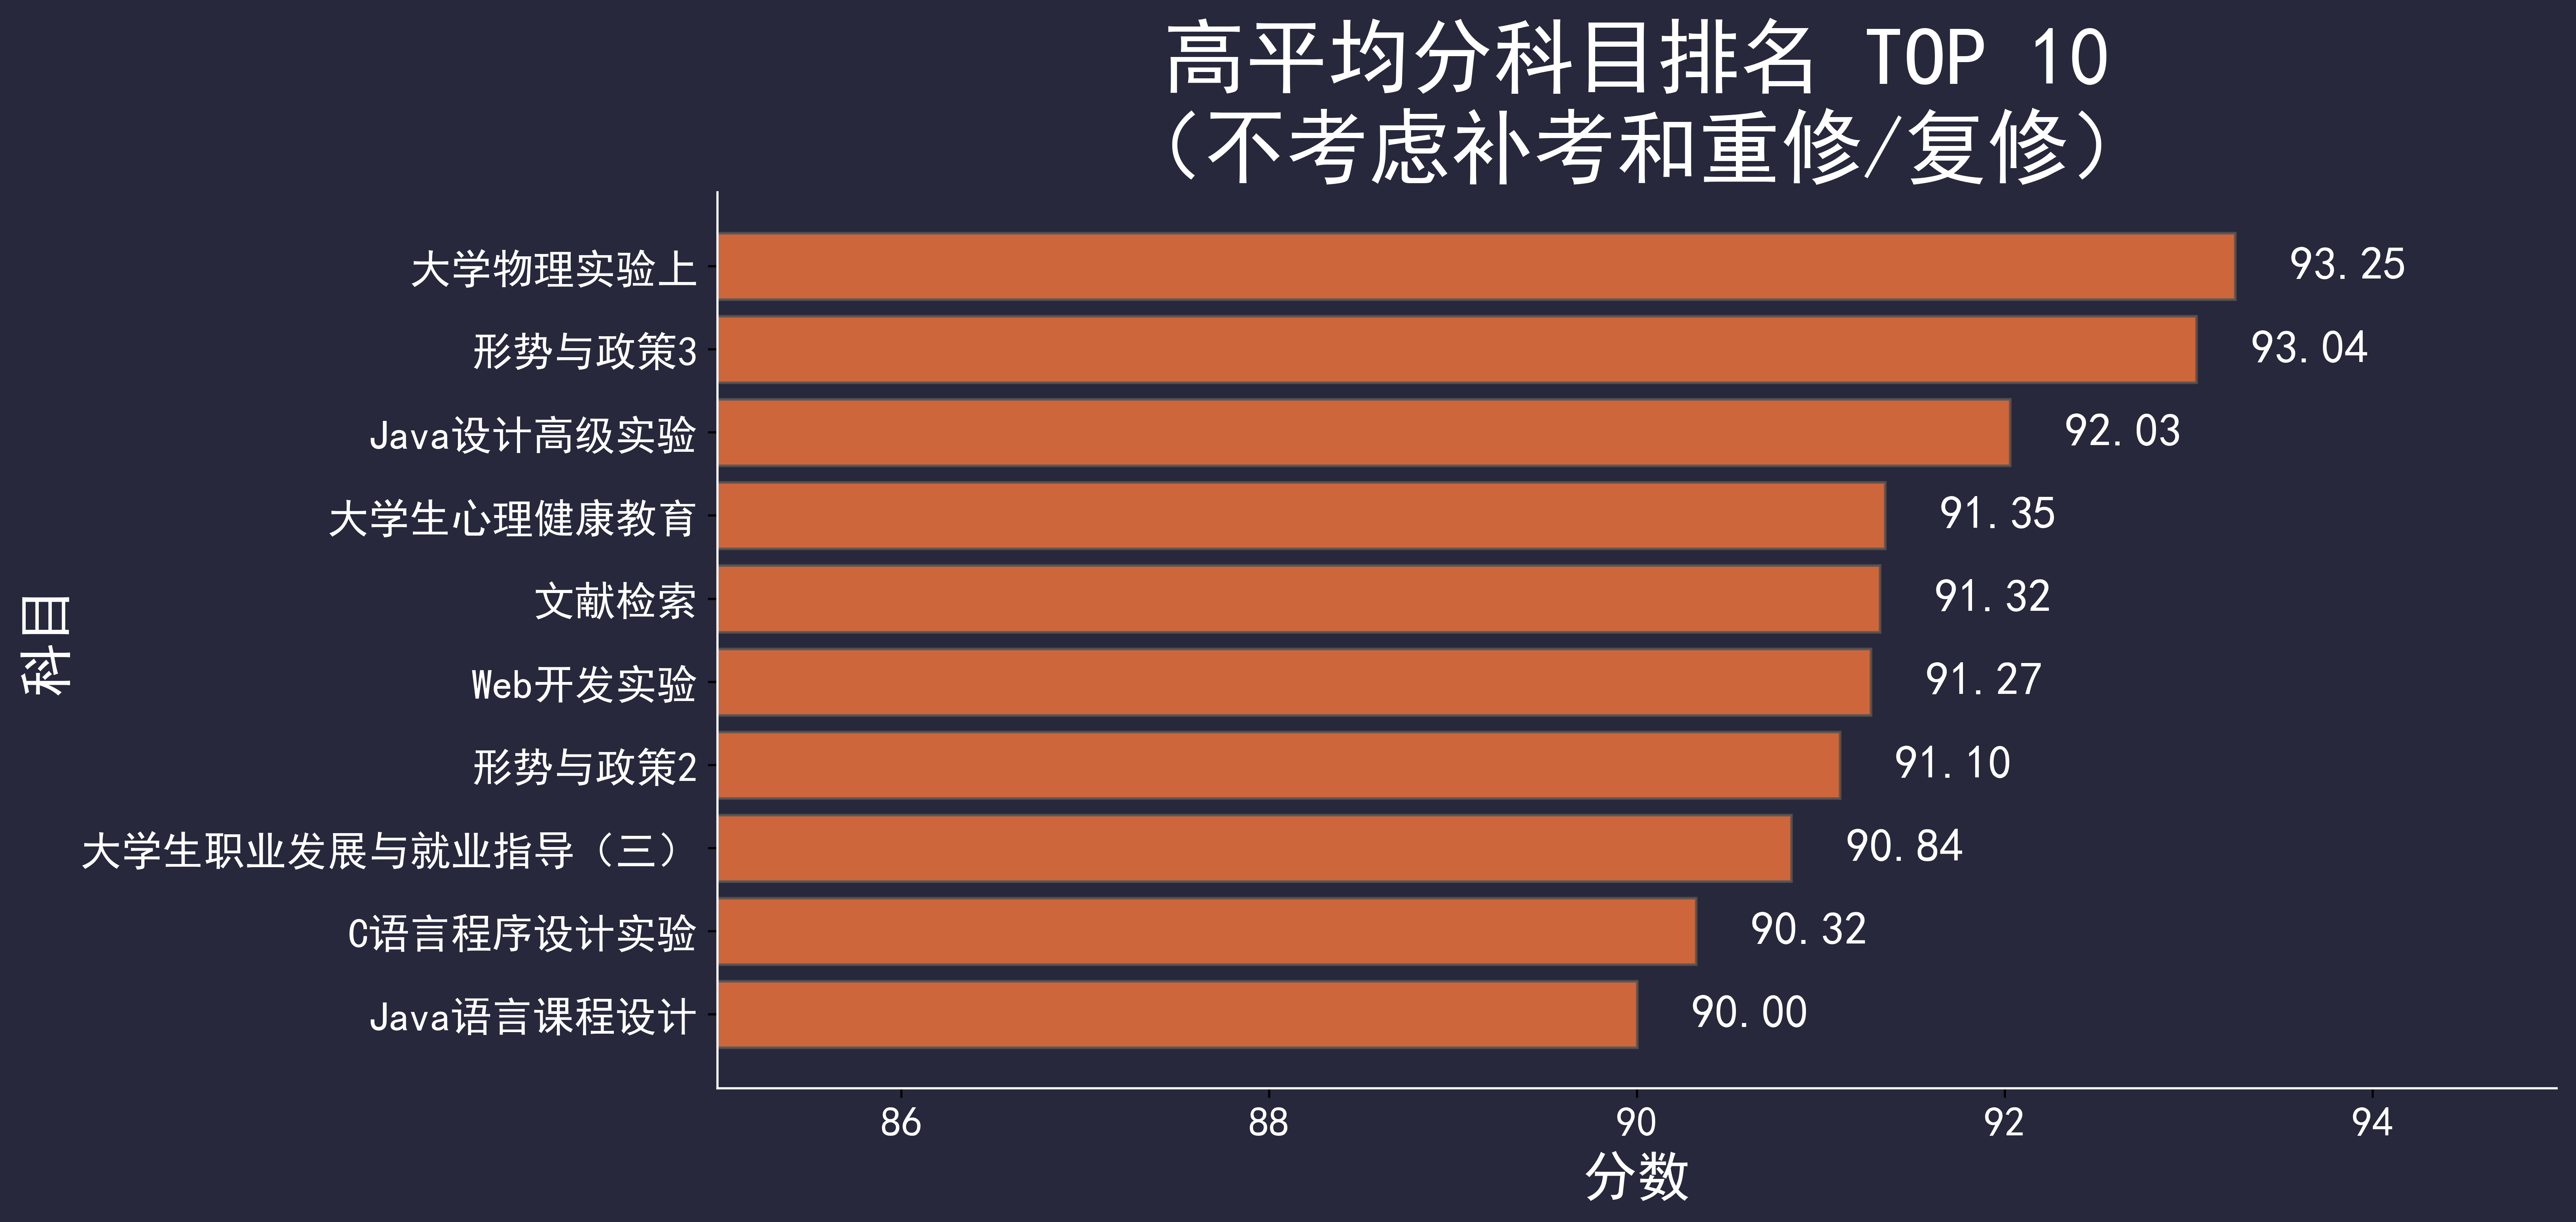

In [113]:

# 从高到低排序
top10 = df.drop(['stuid', 'creditScore', 'name'], axis=1).mean().sort_values(ascending=False).head(10)
top10.sort_values(inplace=True, ascending=True)
drawBarh(series=top10, title='高平均分科目排名 TOP 10\n（不考虑补考和重修/复修）', range=(85,95), savePath='./top10.png')


# 平均分最低的课

C:\Users\lihai\AppData\Local\Temp/ipykernel_13188/1139017172.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top10 = df.drop(['stuid', 'creditScore'], axis=1).mean().sort_values(ascending=True).head(10)


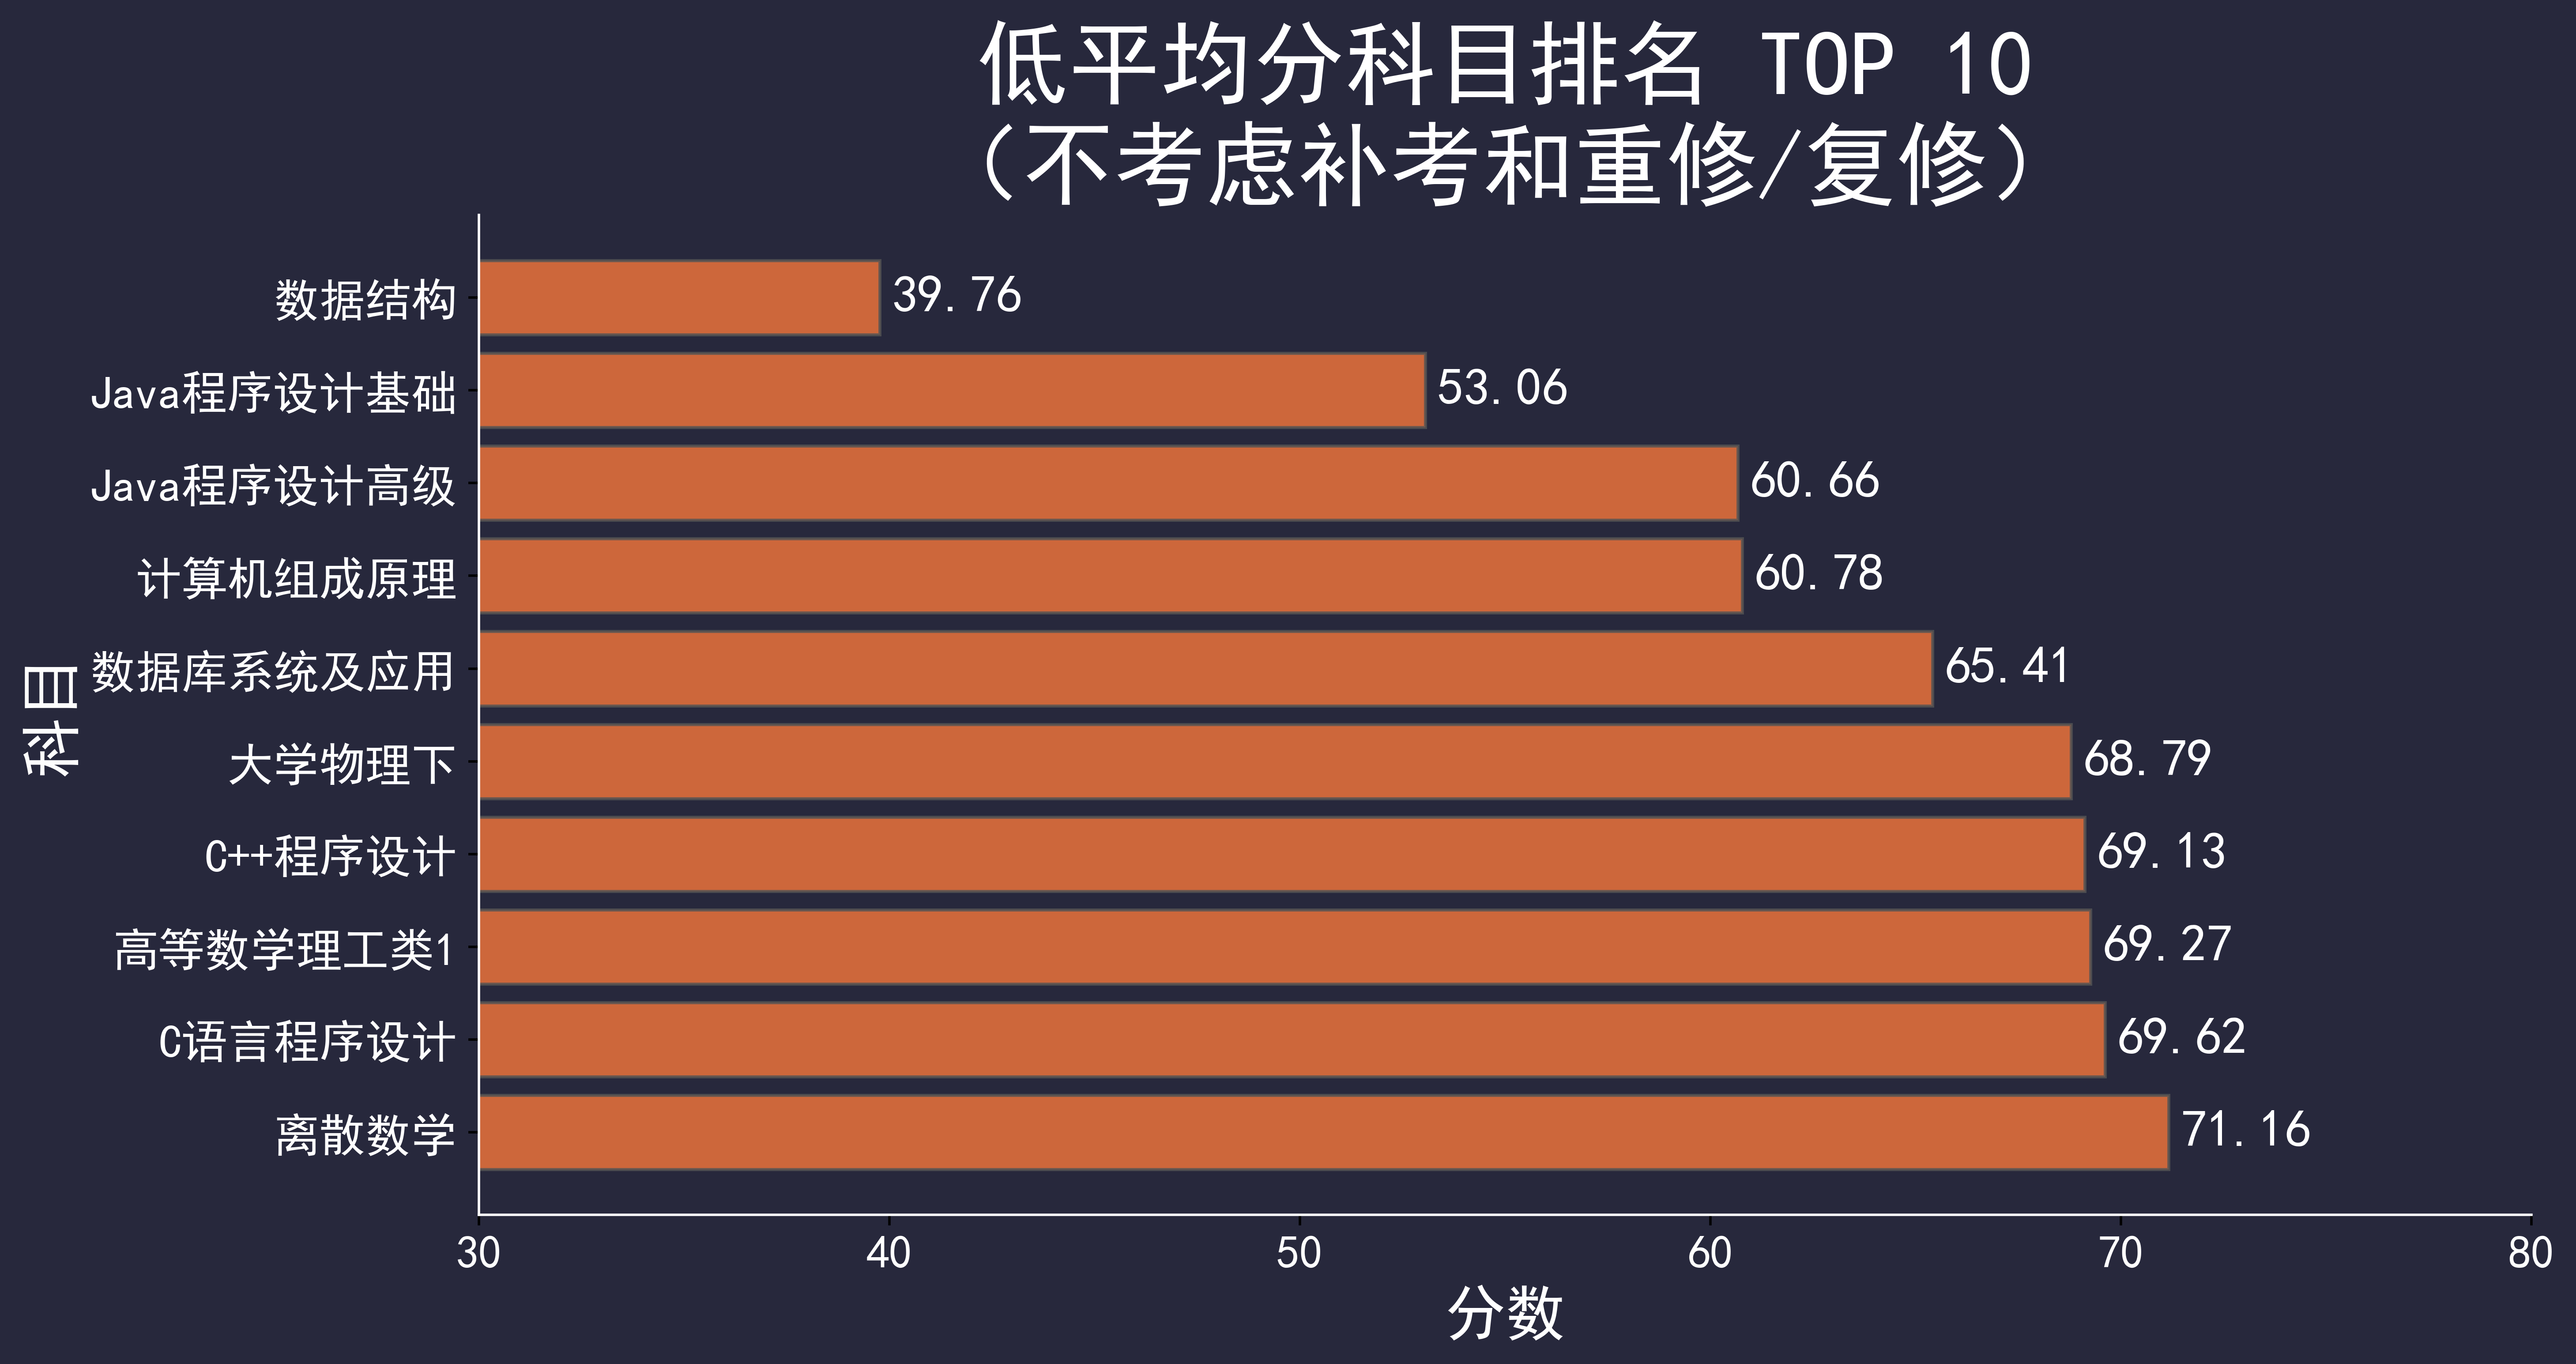

In [112]:

# 从低到高排序
top10 = df.drop(['stuid', 'creditScore'], axis=1).mean().sort_values(ascending=True).head(10)
drawBarh(series=top10.sort_values(ascending=False), title='低平均分科目排名 TOP 10\n（不考虑补考和重修/复修）', range=(30,80), savePath='./top10_low.png')

# 挂科最少的十门课

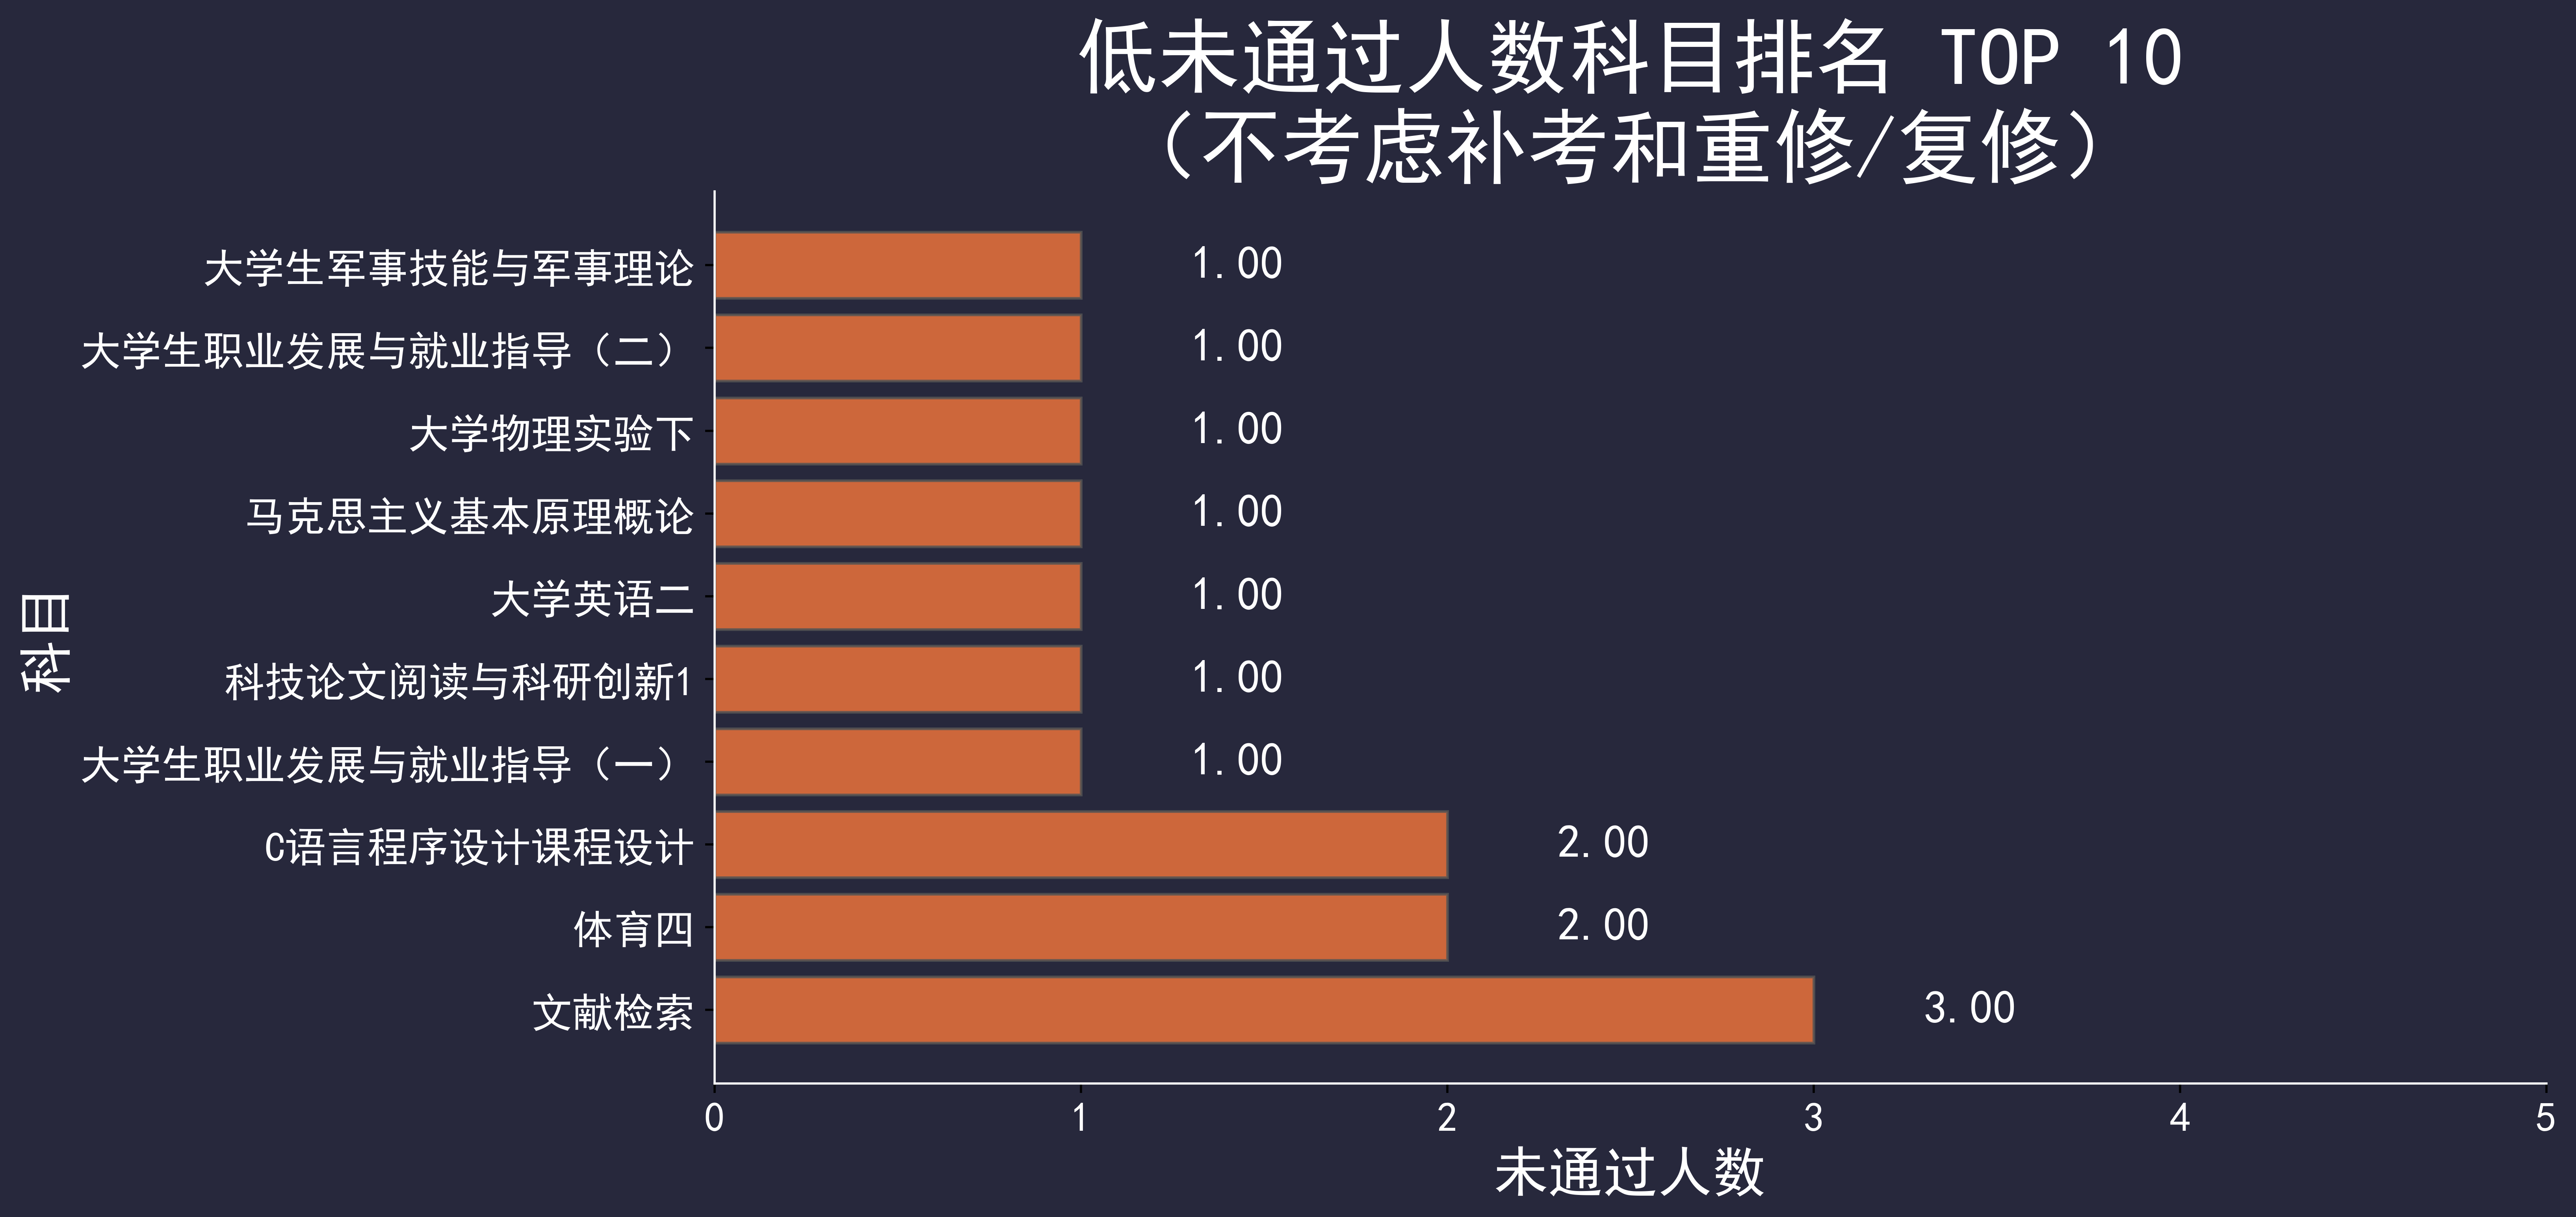

In [108]:
# 小于 60 分的人数

fail = df.drop(['stuid', 'creditScore', 'name'], axis=1)
# 挂科人数
fail = fail[fail < 60].count()
# 去除没挂科的课
fail = fail[fail > 0].sort_values(ascending=True)
drawBarh(series=fail.head(10).sort_values(ascending=False),title='低未通过人数科目排名 TOP 10\n（不考虑补考和重修/复修）',range=(0,5), xLabel='未通过人数',savePath='./fail.png')

# 挂科最多的十门课

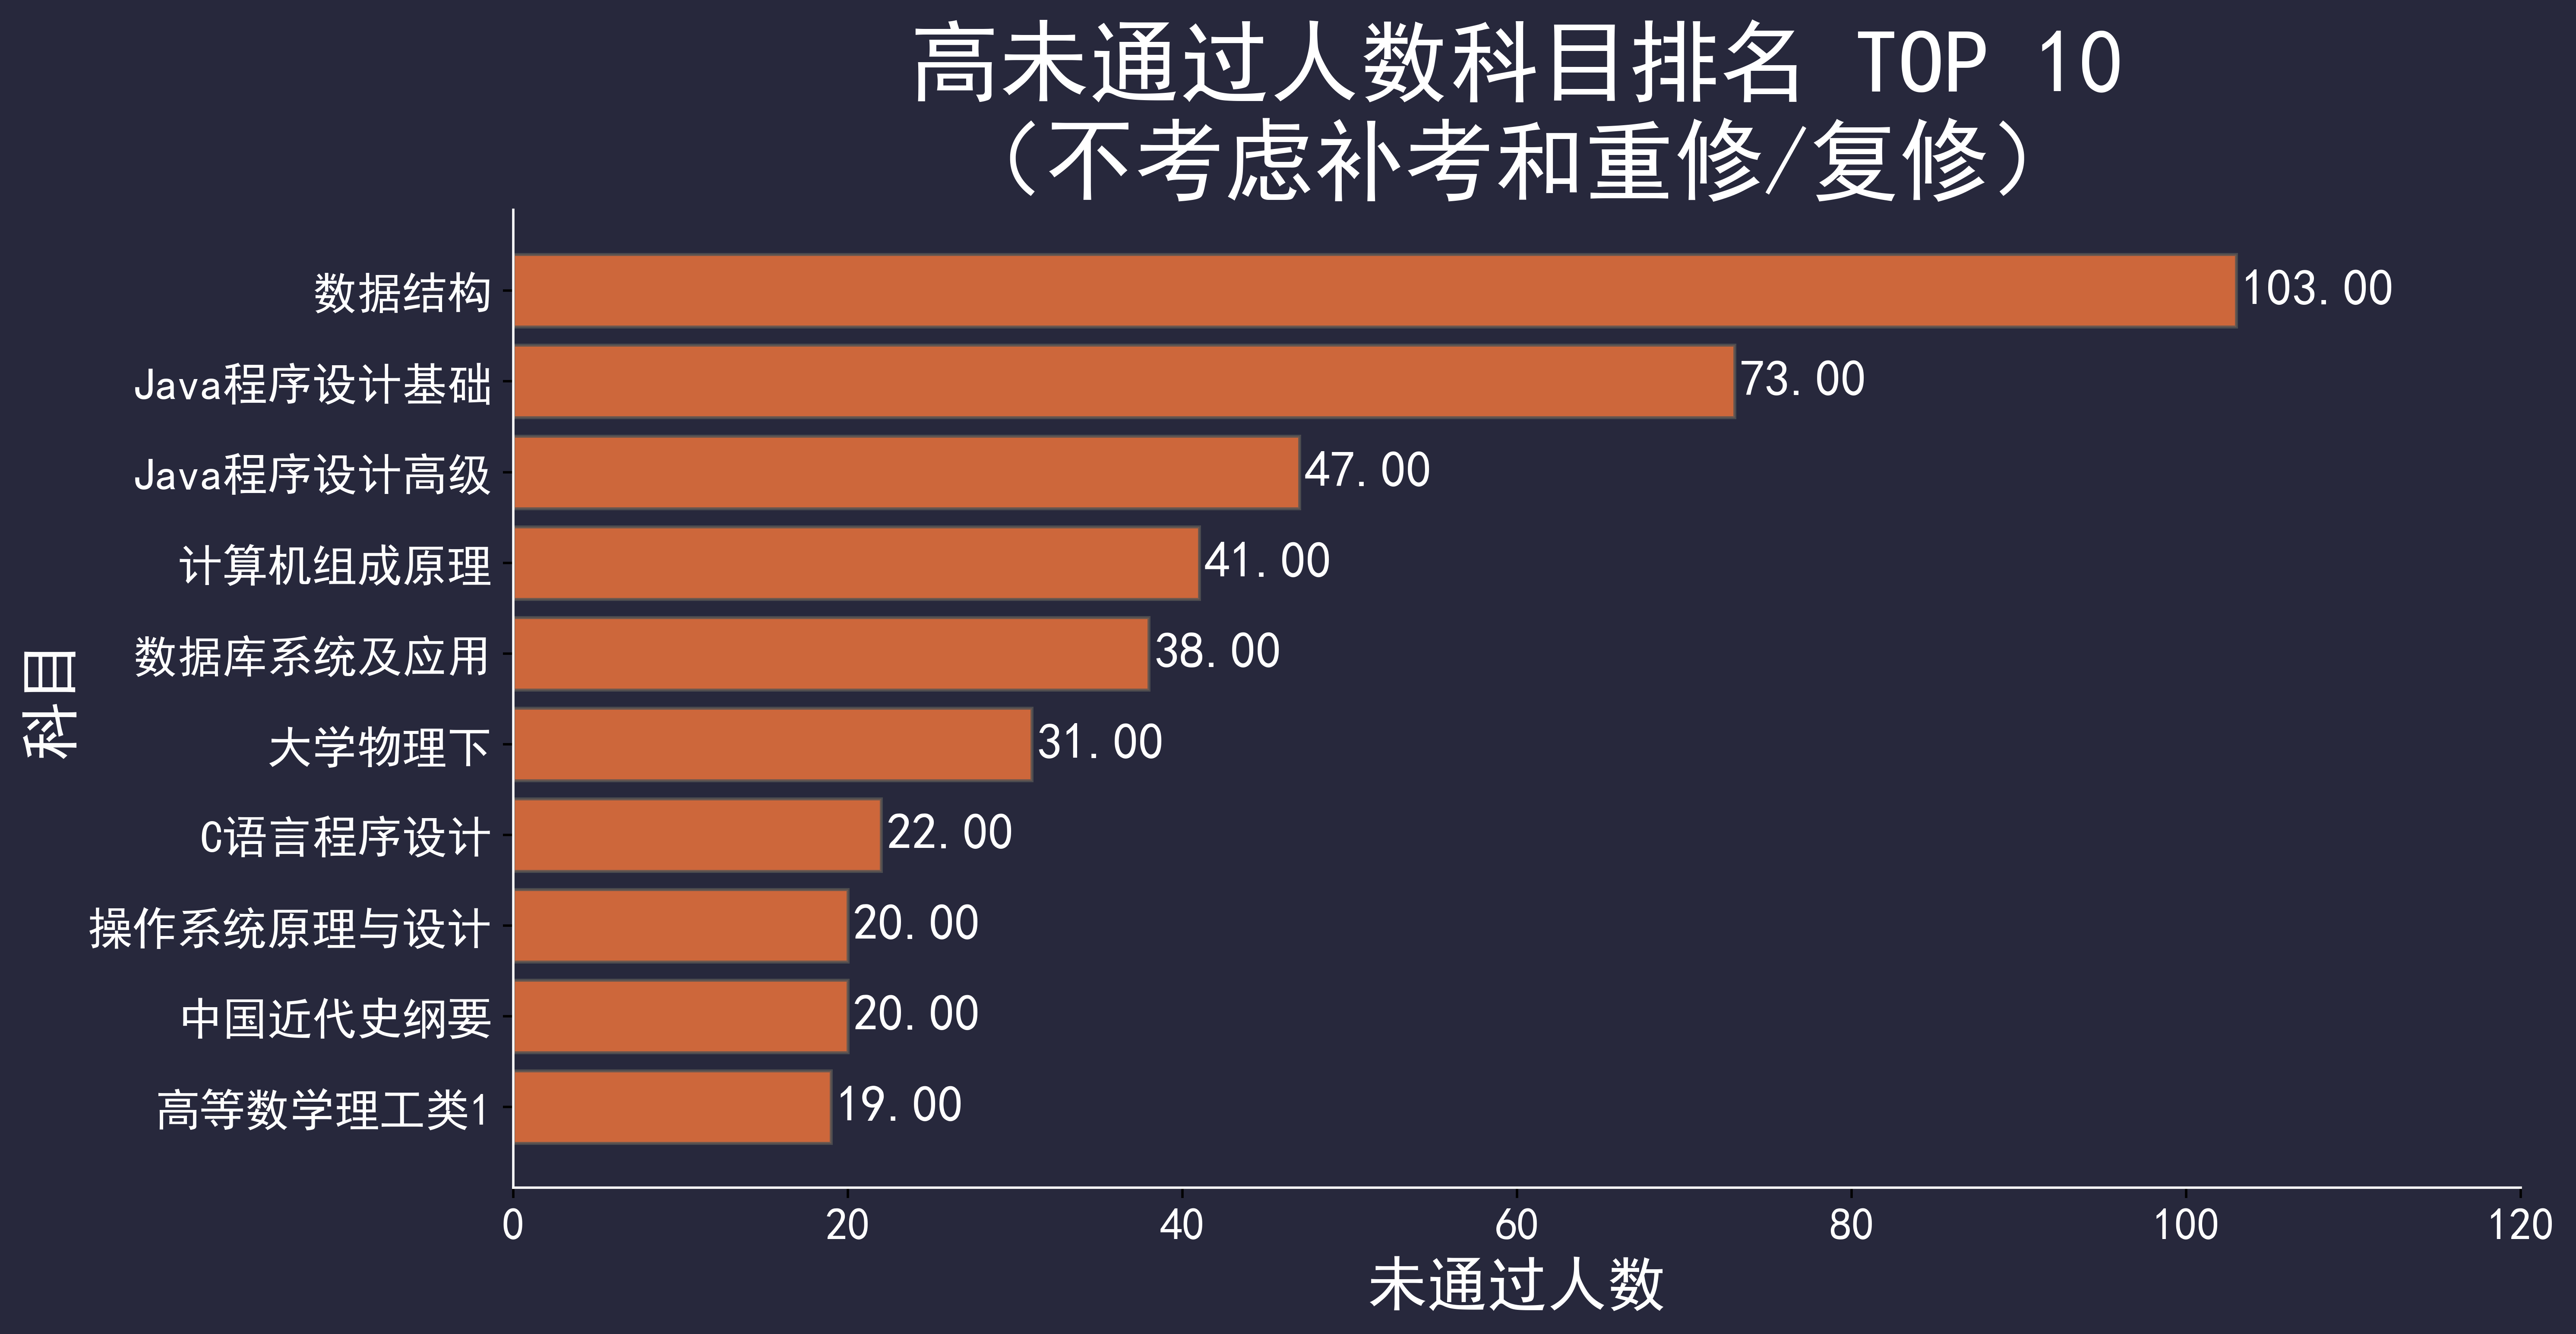

In [109]:
# 小于 60 分的人数

fail = df.drop(['stuid', 'creditScore', 'name'], axis=1)
# 挂科人数
fail = fail[fail < 60].count().sort_values(ascending=False)
drawBarh(series=fail.head(10).sort_values(ascending=True),title='高未通过人数科目排名 TOP 10\n（不考虑补考和重修/复修）',range=(0,120), xLabel='未通过人数',savePath='./fail_high.png')

# 科目的挂科人数分布

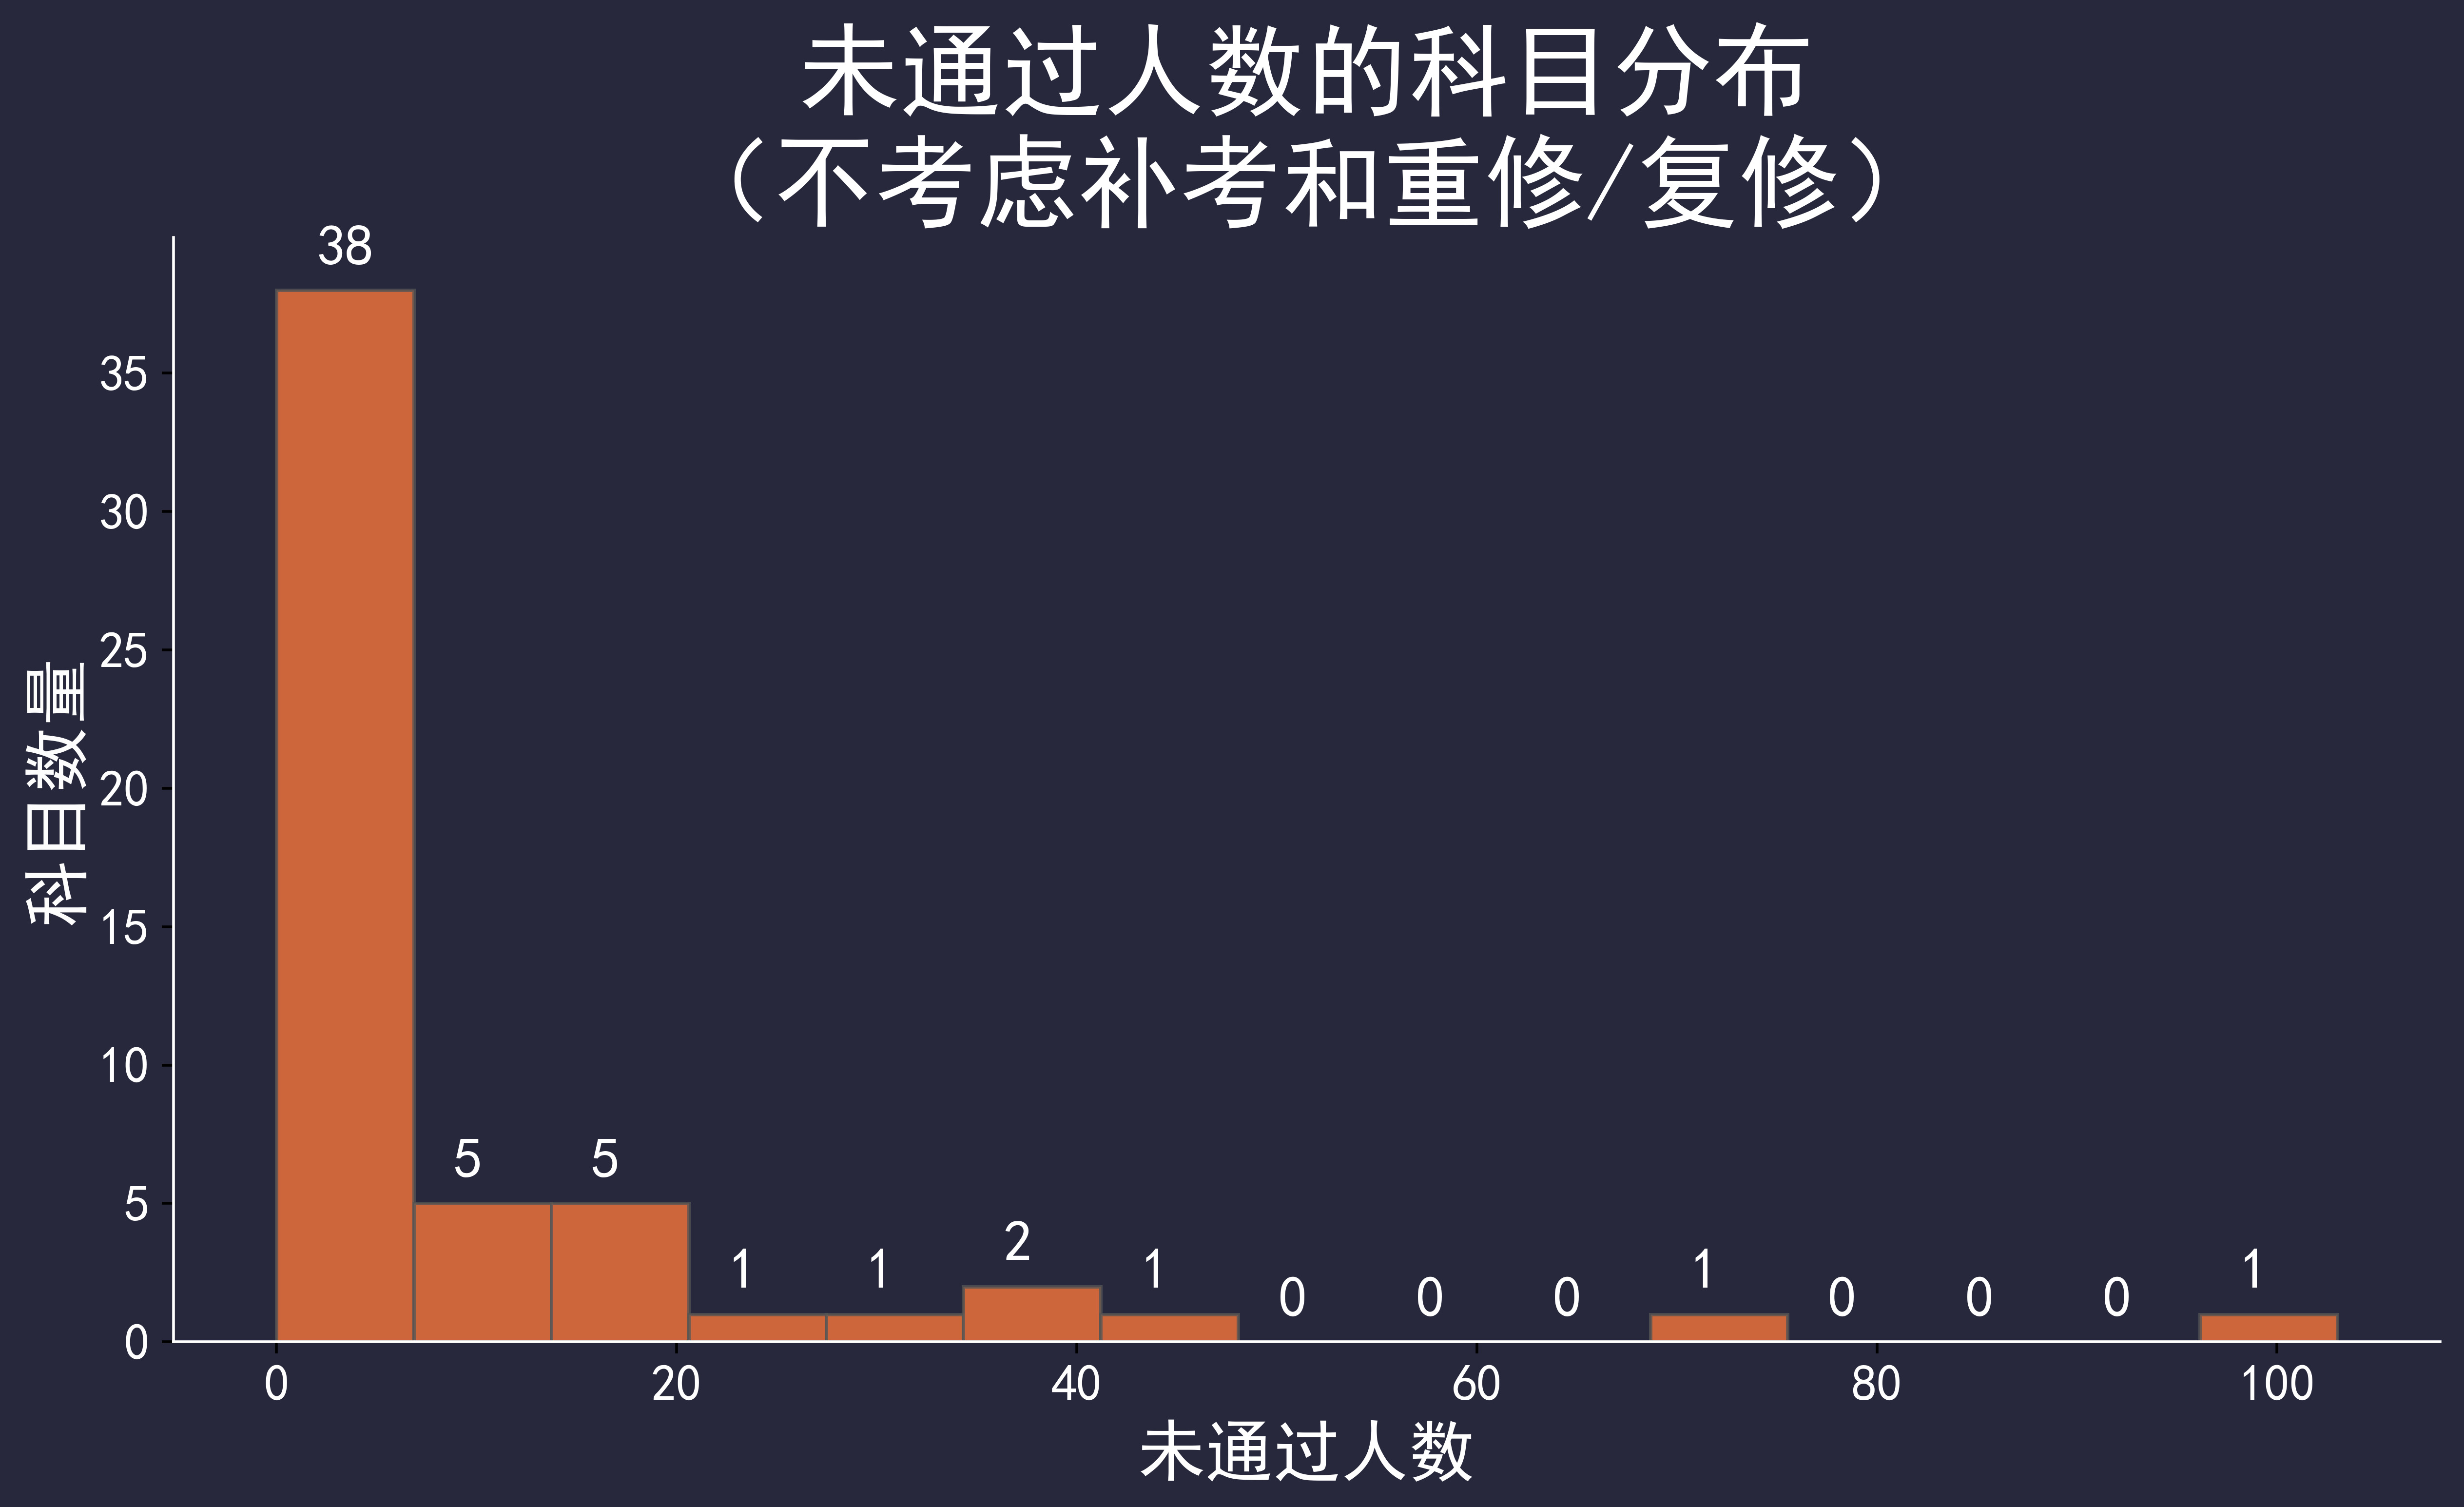

In [114]:
fail = df.drop(['stuid', 'creditScore', 'name'], axis=1)
fail = fail[fail < 60].count()
drawHist(series=fail, title='未通过人数的科目分布\n（不考虑补考和重修/复修）', bins=15, savePath='./fail_hist.png', xLabel='未通过人数', yLabel='科目数量', yoffset=1.5)


# 个人的挂科数量分布

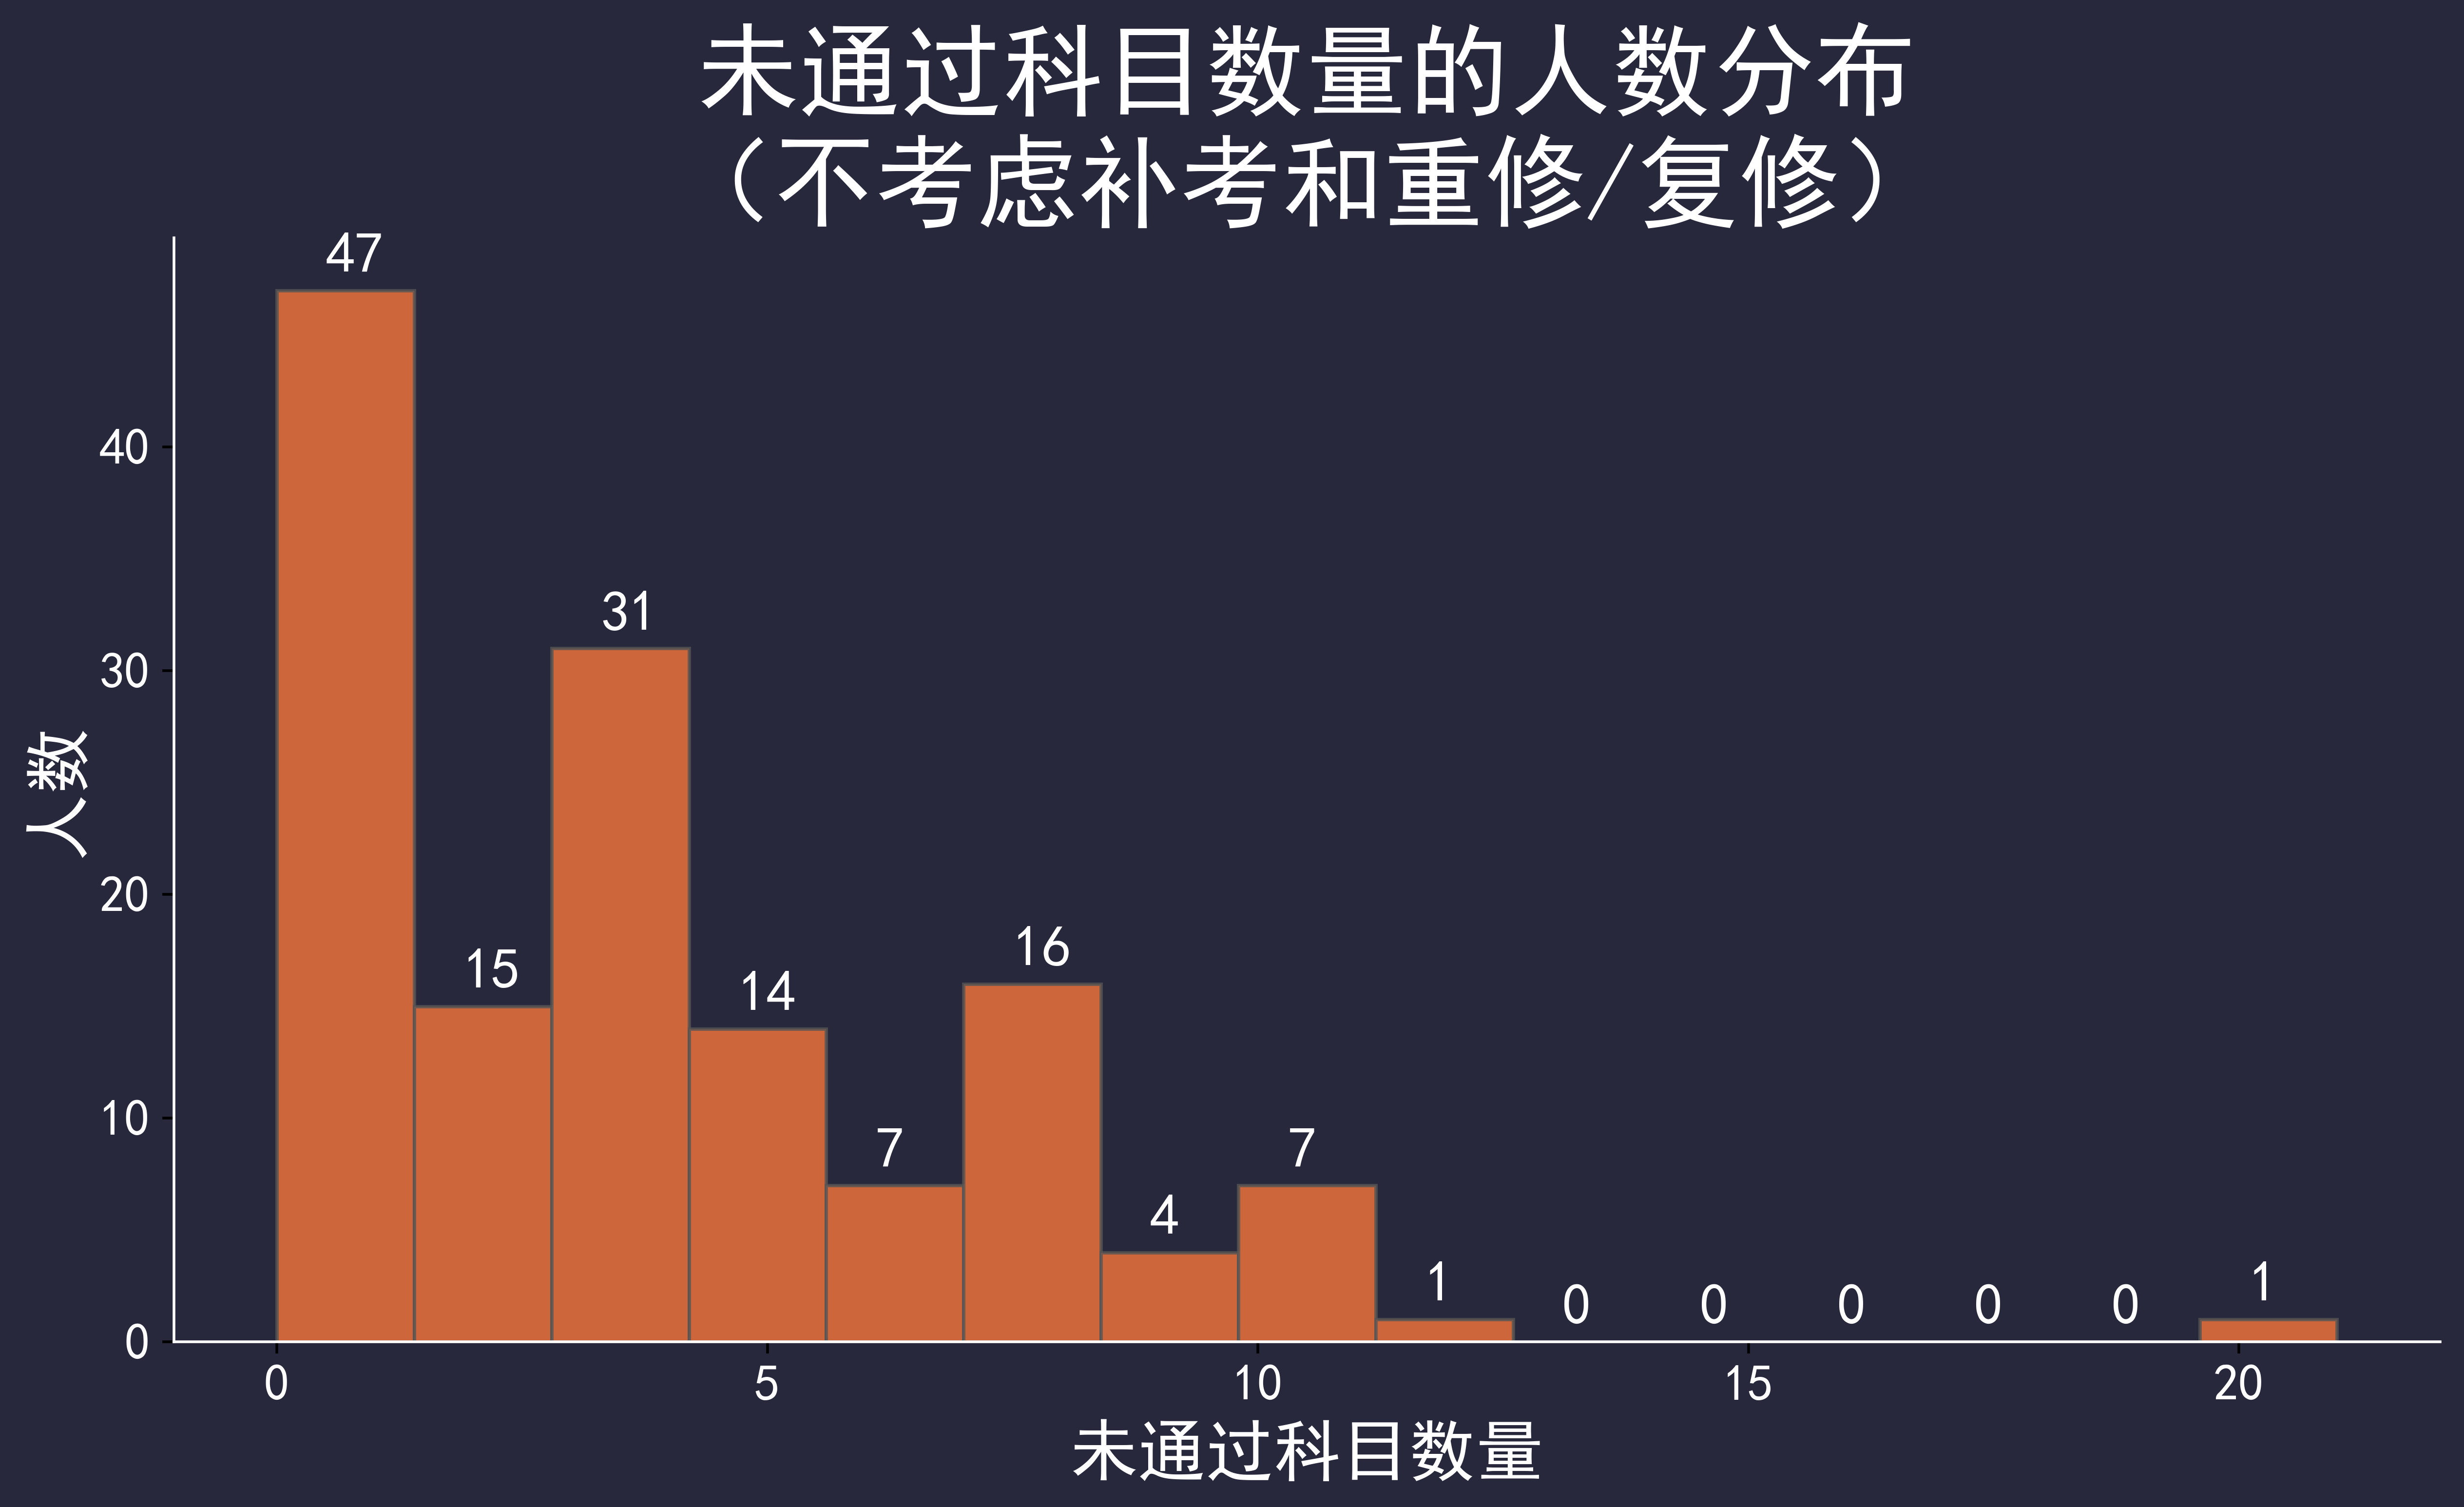

In [111]:
fail = df.drop(['stuid', 'creditScore', 'name'], axis=1)
fail = fail[fail < 60].T.count()
drawHist(series=fail, title='未通过科目数量的人数分布\n（不考虑补考和重修/复修）', bins=15, savePath='./fail_hist_person.png', xLabel='未通过科目数量', yLabel='人数', xoffset=0.5, yoffset=1.5)

# 排位 TOP 10

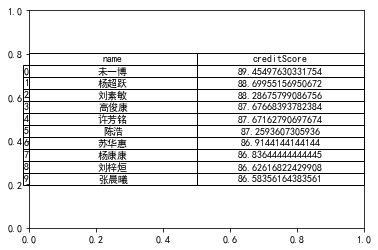

In [128]:
top10 = pandas.DataFrame(df, columns=['name', 'creditScore']).sort_values(ascending=False,by='creditScore').head(10)

# 绘制数据表格

plt.table(cellText=top10.values,colLabels=top10.columns,loc='center',cellLoc='center',rowLabels=top10.index,)

